<a href="https://colab.research.google.com/github/marinavillaschi/portfolio_datascience_mpv/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados da Violência no Rio de Janeiro

*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi)*


<center><img width="100%" src="https://img.freepik.com/fotos-gratis/paisagem-do-rio-de-janeiro-cercada-pelo-mar-sob-um-ceu-azul-no-brasil_181624-14153.jpg"></center>


<a href="https://br.freepik.com/fotos/pessoas">Pessoas foto criado por wirestock - br.freepik.com</a>


O Rio de Janeiro é um dos principais cartões postais do Brasil, visita obrigatória turisticamente falando.

Mas além disso, a cidade está sempre em evidência na mídia no quesito segurança pública, pois vive uma crise que vem de décadas atrás. Infelizmente a criminalização da pobreza está profundamente enraizada no tecido da sociedade carioca.

A proposta desse projeto é realizar uma análise exploratória dos dados referentes à violência do Rio de Janeiro afim de obter alguns insights.

Vamos lá!



  

## Obtenção dos Dados


Os dados utilizados para essa análise foram obtidos do [ISP Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html), uma de base de dados abertos do Instituto de Segurança Publica de registros criminais e atividade policial do estado do Rio de Janeiro.

O arquivo baixado `violencia_rio.csv` para esta análise foi minimamente pré-processado e está disponível [neste repositório do github do Carlos Melo](https://github.com/carlosfab/dsnp2/tree/master/datasets).

In [2]:
# importando os pacotes necessarios

import pandas as pd

# importando o arquivo violencia_rio.csv para um DataFrame

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")



## Análise dos Dados

Para dar início, serão apresentadas algumas informações básicas iniciais sobre o *dataframe* para conhecermos melhor os dados a serem estudados.

### Variáveis e entradas

Vamos verificar:
* tamanho do dataframe
* nomes e tipos das variáveis (colunas)

In [3]:
# verificando o tamanho do dataframe
print ("Entradas: ",df.shape[0])
print ("Variáveis: ",df.shape[1],"\n")

# imprimindo os nomes e tipos de variáveis
print (df.dtypes)


Entradas:  344
Variáveis:  56 

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos    

Já é possível perceber que é um dataset extenso, possui muitas variáveis (56 colunas) e não seria interessante listarmos todas neste momento. Porém vamos nos familiarizar com algumas que serão exploradas aqui.

**Lista de Variáveis exploradas do *dataset*:**

* `vano`: ano da ocorrência
* `mes`: mês da ocorrência
* `hom_doloso`: quantidade de ocorrências de homicídio doloso
* `roubo_veiculo`: quantidade de ocorrências de roubo de veículos
* `furto_veiculo`: quantidade de ocorrências de furto de veículos
* `recuperacao_veiculos`: quantidade de ocorrências de veículos recuperados
* `roubo_bicicleta`: quantidade de ocorrências de roubo de bicicleta
* `furto_bicicleta`: : quantidade de ocorrências de furto de bicicleta

A seguir serão impressas as 5 primeiras entradas para então visualizarmos a aparência do *dataset*.

In [4]:
# imprimindo as 5 primeiras entradas do dataset

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Valores ausentes no *dataset*

É muito importante entender logo no início da análise a proporção de valores ausentes do *dataset*, uma vez que isso indica a qualidade do mesmo.

Para isso, será impresso a porcentagem de valores ausentes em cada coluna, em ordem decrescente:

In [5]:
# porcentagem de valores ausentes em cada coluna, em ordem decrescente
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


A partir da relação obtida, é possível observar:

* As variáveis `roubo_bicicleta` e `furto_bicicleta` tem 80% das entradas nulas. 
* 20 de 56variáveis (36%) tem em torno de 45% das entradas nulas.
* 8 de 56 variáveis (14%) tem em torno de 25% das entradas nulas.
* Apenas 26 de 56 variáveis (46%) não possuem valores nulos.

Resumindo, aproximadamente metade do nosso *dataset* tem todos os valores não nulos e a outra metade tem de 25 a 80% de seus valores nulos, o que indica baixa qualidade.
Para uma análise mais profunda, é necessário tratar esses dados faltantes.

## Informações Estatísticas da Violência no Rio de Janeiro

Após avaliarmos a qualidade do *dataset*, vamos conhecer os dados estatísticos, que serão utilizados nas análises posteriores.

Abaixo será plotado o resumo estatístico:


In [6]:
# resumo estatístico

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

A partir do resumo estatístico, mesmo trabalhando com um *dataset* com muitas variáveis, é possível observar indicações de presença de *outliers*:

* algumas variáveis possuem seus valores máximos muito superiores aos 75% dos valores.

* algumas variáveis apresentam desvio padrão (std) alto, o que indica alta dispersão dos dados.


### Análise de crimes relacionados a veículos

Agora que já visualizamos o resumo estatístico, podemos escolher alguns dados para trabalharmos.

Faremos uma breve análise dos dados referentes a veículos, são eles:  `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`.

Como essas três variáveis não possuem valores nulos, nossa análise é válida.
Vamos imprimir a média de cada uma delas:

In [7]:
# média das variáveis `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`

print("Média de veículos roubados:    ", round (df.roubo_veiculo.mean(),2))
print("Média de veículos furtados:    ", round (df.furto_veiculos.mean(),2))
print("Média de veículos recuperados: ", round (df.recuperacao_veiculos.mean(),2))

Média de veículos roubados:     2448.7
Média de veículos furtados:     1674.67
Média de veículos recuperados:  1772.24


Agora que obtivemos as médias, vamos entender qual a relação entre elas, ou seja, qual a proporção de veiculos roubados e furtados são recuperados posteriormente, da seguinte forma:


$\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

In [9]:
# porcentagem de veiculos recuperados em relação a veiculos roubados e furtados

print("Aproximadamente", round(df.recuperacao_veiculos.mean() / (df.roubo_veiculo.mean() + df.furto_veiculos.mean())*100),"% dos carros roubados e furtados são recuperados posteriormente.")

Aproximadamente 43 % dos carros roubados e furtados são recuperados posteriormente.


### Análise de crimes relacionados à vida

Vamos identificar quais foram os valores mínimos e máximos de homicídios dolosos:


In [10]:
print(df.hom_doloso.min(), "foi o menor número de homicídios dolosos registrados em um mês.")
print(df.hom_doloso.max(), "foi o maior número de homicídios dolosos registrados em um mês.")

272 foi o menor número de homicídios dolosos registrados em um mês.
831 foi o maior número de homicídios dolosos registrados em um mês.


É possível perceber uma diferença significativa entre o menor e maior número de homicídios dolosos. Isso nos induz a investigar esses dados mais afundo afim de entender o que pode ter influência no seu aumento ou diminuição.

Para isto, vamos identificar as informações da linha referente ao menor e maior número de homicídios dolosos: 


In [11]:
# verificando a data de menor número de homicídios dolosos
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [12]:
# verificando a data de maior número de homicídios dolosos
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Obtivemos as datas de menor e maior número de homicídios dolosos:
* Menor: junho 2015
* Maior: janeiro 1995

Esses dados nos sugerem que **pode** estar acontecendo uma diminuição dos crimes de homicídios dolosos de 1995 para cá.

Porém nesse momento não é possível afirmar isto, seria necessário uma análise mais profunda.

## Visualização de Dados

Para conseguirmos visualizar a distribuição dos valores dentro dessa variável `hom_doloso` iremos plotar um histograma, uma ótima ferramenta de visualização de dados.



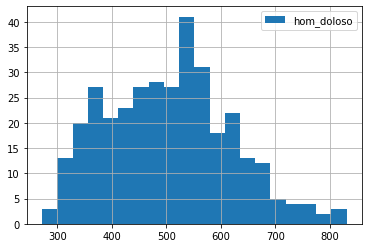

In [13]:
# plotando o histograma de `hom_doloso`

df.hom_doloso.hist(legend=True, bins=20,);

A partir do histograma plotado acima podemos observar:
* Aproximadamente 550 homicídios dolosos são registrados por mês em mais de 40 meses.
* Houveram menos de 5 meses com quantidade inferior a 300 homicídios dolosos registrados.
* Houveram menos de 5 meses com quantidade superior a 800 homicídios dolosos registrados.

## Conclusão

Foi feita apenas uma análise exploratória da base de dados do Instituto de Segurança Pública do Rio de Janeiro, porém já foi possível perceber muitos dados faltantes e a presença de *outliers* em algumas das variáveis, algo normal por se tratar de uma base de dados reais. 

Para uma análise mais profunda a partir desta, é necessário tratar os dados faltantes e eliminar os *outliers*.

De toda forma, como já era esperado, os dados nos mostram que a criminalidade da cidade do Rio de Janeiro atinge números indesejados e que merecem mais atenção para buscar reduzi-los.